## Feature Scaling and Normalization - Lab

## Introduction
In this lab, you'll practice your feature scaling and normalization skills!

## Objectives
You will be able to:
* Implement min-max scaling, mean-normalization, log normalization and unit vector normalization in python
* Identify appropriate normalization and scaling techniques for given dataset

## Back to our Boston Housing data

Let's import our Boston Housing data. Remember we categorized two variables and deleted the "NOX" (nitride oxide concentration) variable because it was highly correlated with two other features.

In [1]:
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()

boston_features = pd.DataFrame(boston.data, columns = boston.feature_names)

# first, create bins for based on the values observed. 5 values will result in 4 bins
bins = [0, 3, 4 , 5, 24]
bins_rad = pd.cut(boston_features['RAD'], bins)
bins_rad = bins_rad.cat.as_unordered()

# first, create bins for based on the values observed. 5 values will result in 4 bins
bins = [0, 250, 300, 360, 460, 712]
bins_tax = pd.cut(boston_features['TAX'], bins)
bins_tax = bins_tax.cat.as_unordered()

tax_dummy = pd.get_dummies(bins_tax, prefix="TAX")
rad_dummy = pd.get_dummies(bins_rad, prefix="RAD")
boston_features = boston_features.drop(["RAD","TAX"], axis=1)
boston_features = pd.concat([boston_features, rad_dummy, tax_dummy], axis=1)
boston_features = boston_features.drop("NOX",axis=1)

## Look at the histograms for the continuous variables

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [3]:
boston_cont = boston_features.iloc[:, :10]
boston_cont = boston_cont.drop(['CHAS'], axis=1)
boston_cont.head()

,CRIM,ZN,INDUS,RM,AGE,DIS,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,6.575,65.2,4.0900,15.3,396.90,4.98
1,0.02731,0.0,7.07,6.421,78.9,4.9671,17.8,396.90,9.14
2,0.02729,0.0,7.07,7.185,61.1,4.9671,17.8,392.83,4.03
3,0.03237,0.0,2.18,6.998,45.8,6.0622,18.7,394.63,2.94
4,0.06905,0.0,2.18,7.147,54.2,6.0622,18.7,396.90,5.33


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a25b83fd0>,
      dtype=object)

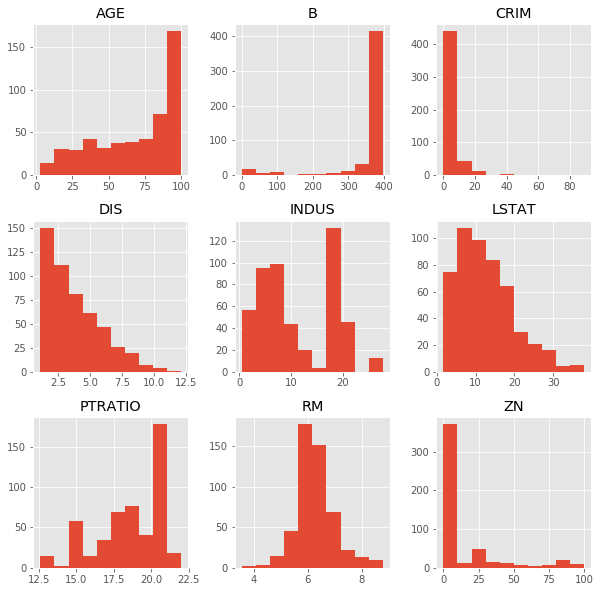

In [4]:
boston_cont.hist(figsize=(10,10))

## Perform log transformations for the variables where it makes sense

Analyze the results in terms of how they improved the normality performance. What is the problem with the "ZN" variable?  

In [5]:
import numpy as np

In [6]:
boston_log = pd.DataFrame(np.log(boston_cont))
boston_log.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


,CRIM,ZN,INDUS,RM,AGE,DIS,PTRATIO,B,LSTAT
0,-5.064036,2.890372,0.837248,1.883275,4.177459,1.408545,2.727853,5.983684,1.605430
1,-3.600502,-inf,1.955860,1.859574,4.368181,1.602836,2.879198,5.983684,2.212660
2,-3.601235,-inf,1.955860,1.971996,4.112512,1.602836,2.879198,5.973377,1.393766
3,-3.430523,-inf,0.779325,1.945624,3.824284,1.802073,2.928524,5.977949,1.078410
4,-2.672924,-inf,0.779325,1.966693,3.992681,1.802073,2.928524,5.983684,1.673351


ValueError: supplied range of [-inf, 4.605170185988092] is not finite

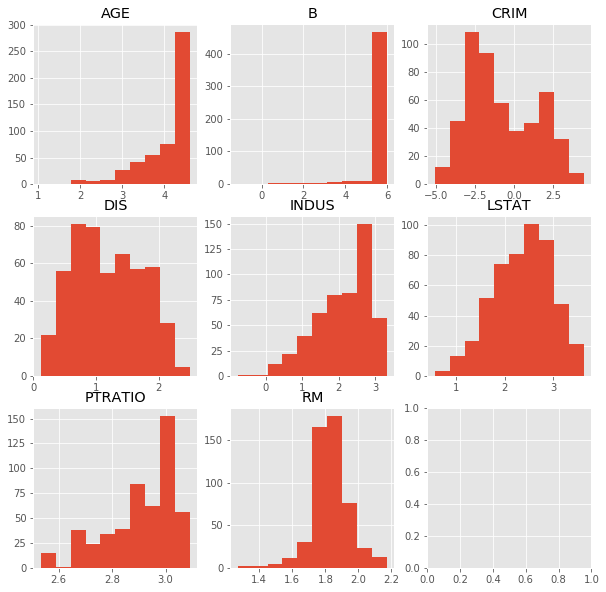

In [7]:
boston_log.hist(figsize =[10,10])

"ZN" has a lot of zeros (more than 50%!). Remember that this variable denoted: "proportion of residential land zoned for lots over 25,000 sq.ft.". It might have made sense to categorize this variable to "over 25,000 feet or not (binary variable 1/0). Now you have a zero-inflated variable which is cumbersome to work with.

In [8]:
boston_cont["ZN"].describe()

count    506.000000
mean      11.363636
std       23.322453
min        0.000000
25%        0.000000
50%        0.000000
75%       12.500000
max      100.000000
Name: ZN, dtype: float64

## Try different types of transformations on the continuous variables

Store your final features in a dataframe `features_final`

In [9]:
age = boston_cont['AGE']
b = boston_cont['B']
crim = boston_log['CRIM']
dis = boston_log['DIS']
indus = boston_log['INDUS']
lstat = boston_log['LSTAT']
ptratio = boston_log['PTRATIO']
rm = boston_cont['RM']

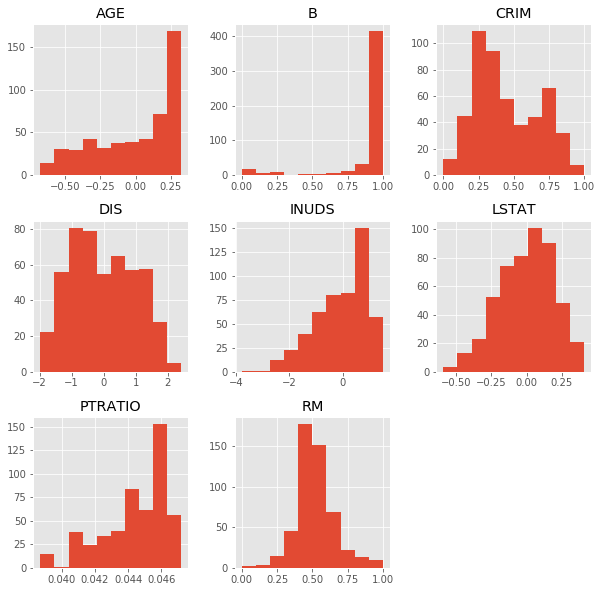

In [10]:
features_final = pd.DataFrame([])

features_final['AGE'] = (age - np.mean(age))/ (max(age) - min(age)) 
features_final['B'] = (b - min(b))/ (max(b) - min(b))
features_final['CRIM'] = (crim - min(crim))/ (max(crim) - min(crim))
features_final['DIS'] = (dis - np.mean(dis))/ np.sqrt(np.var(dis))
features_final['INUDS'] = (indus - np.mean(indus))/ np.sqrt(np.var(indus))
features_final['LSTAT'] = (lstat - np.mean(lstat))/ (max(lstat) - min(lstat))
features_final['PTRATIO'] = (ptratio)/ (np.linalg.norm(ptratio))
features_final['RM'] = (rm - min(rm))/ (max(rm) - min(rm))

features_final.hist(figsize  = [10, 10]);

## Summary
Great! You've now transformed your final data using feature scaling and normalization, and stored them in the `features_final` dataframe.